In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd 
import matplotlib
from pandas import DataFrame, read_csv

%matplotlib inline

In [2]:
read_csv?

To read CSV file from local drive

In [3]:
Location = r'C:\Users\jcsme\Desktop\CUNY_SPS\data_aquasition\flights.csv'
df = pd.read_csv(Location)

To see data from CSV file

In [4]:
df

,airline,city,on time,delayed
0,ALASKA,Los Angeles,497,62
1,ALASKA,Phoenix,221,12
2,ALASKA,San Diego,212,20
3,ALASKA,San Francisco,503,102
4,ALASKA,Seattle,1841,305
5,AMWEST,Los Angeles,694,117
6,AMWEST,Phoenix,4840,415
7,AMWEST,San Diego,393,65
8,AMWEST,San Francisco,320,129
9,AMWEST,Seattle,201,61


To check for unique values to be grouped

In [5]:
df['airline'].unique()

array(['ALASKA', 'AMWEST'], dtype=object)

In [6]:
sortdf = df.sort_index(axis=0)
sortdf

,airline,city,on time,delayed
0,ALASKA,Los Angeles,497,62
1,ALASKA,Phoenix,221,12
2,ALASKA,San Diego,212,20
3,ALASKA,San Francisco,503,102
4,ALASKA,Seattle,1841,305
5,AMWEST,Los Angeles,694,117
6,AMWEST,Phoenix,4840,415
7,AMWEST,San Diego,393,65
8,AMWEST,San Francisco,320,129
9,AMWEST,Seattle,201,61


To group data by the ariline and aggregate with sum()

In [7]:
table = df.set_index(['airline', 'city']).groupby(['airline', 'city']).sum()
table

on time  delayed
airline city                           
ALASKA  Los Angeles        497       62
        Phoenix            221       12
        San Diego          212       20
        San Francisco      503      102
        Seattle           1841      305
AMWEST  Los Angeles        694      117
        Phoenix           4840      415
        San Diego          393       65
        San Francisco      320      129
        Seattle            201       61

to check the index of all the values

In [8]:
table.index

MultiIndex(levels=[[u'ALASKA', u'AMWEST'], [u'Los Angeles', u'Phoenix', u'San Diego', u'San Francisco', u'Seattle']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'airline', u'city'])

In [9]:
table.index.levels[0]

Index([u'ALASKA', u'AMWEST'], dtype='object', name=u'airline')

In [10]:
table.index.levels[1]

Index([u'Los Angeles', u'Phoenix', u'San Diego', u'San Francisco', u'Seattle'], dtype='object', name=u'city')

Plot with all the data, comparing both Alaska airline and AM WEST delayed and on-time flights.

You can see a pretty cear indication on which city has the most on time flights and delays.

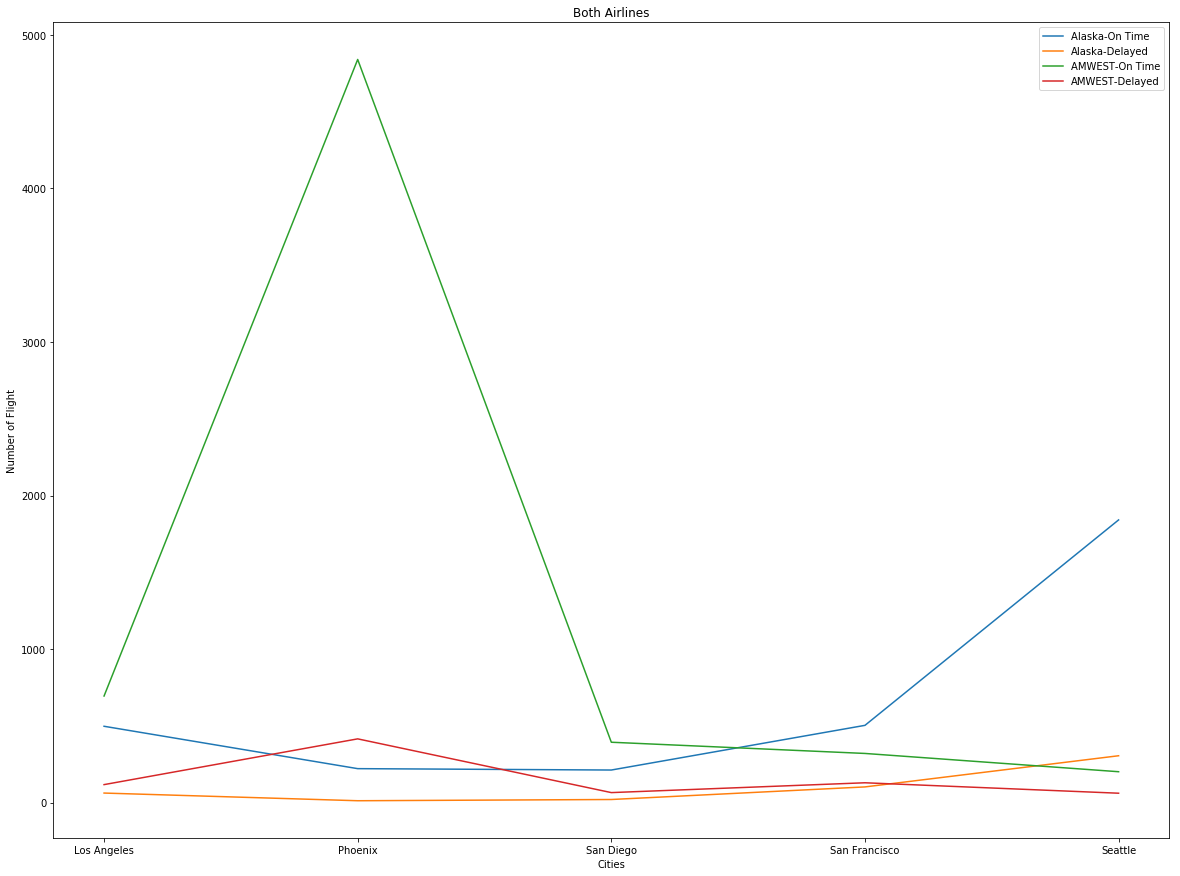

In [44]:
x1 = plt.plot(table.loc['ALASKA'])
x2 = plt.plot(table.loc['AMWEST'])
plt.title('Both Airlines')
plt.ylabel('Number of Flight')
plt.xlabel('Cities')
plt.legend(['Alaska-On Time', 'Alaska-Delayed', 'AMWEST-On Time', 'AMWEST-Delayed'])
plt.rcParams["figure.figsize"] = [20,15]

Just the flight data for Alaska airlines

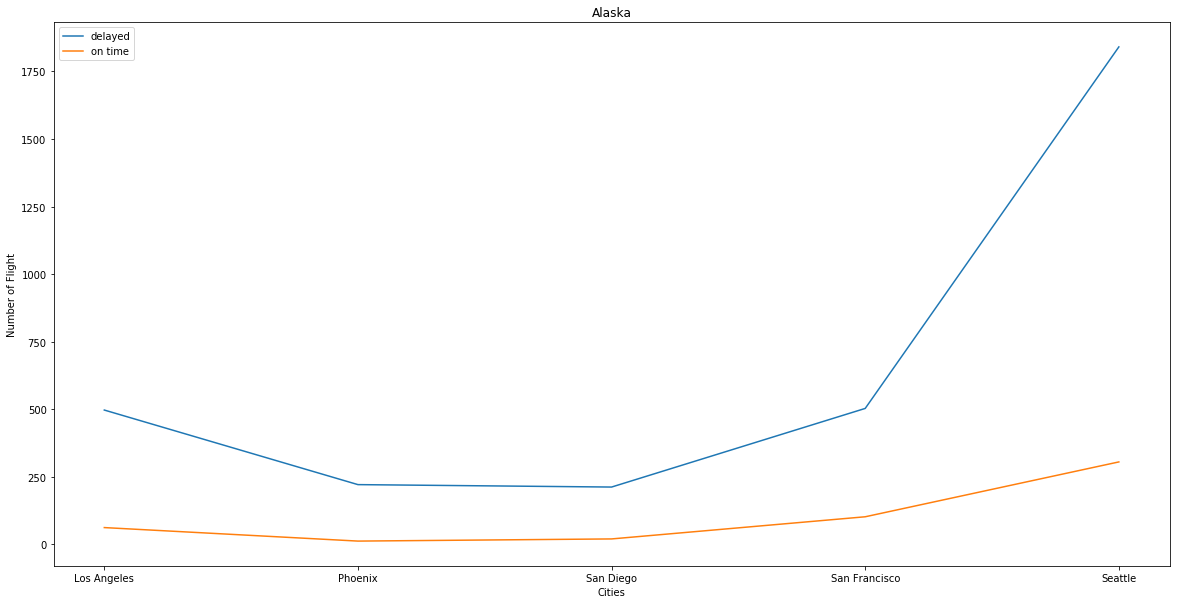

In [40]:
plt.plot(table.loc['ALASKA'])
plt.title('Alaska')
plt.ylabel('Number of Flight')
plt.xlabel('Cities')
plt.legend(['delayed', 'on time'])
plt.rcParams["figure.figsize"] = [20,10]

Flight data for AM West airline by city

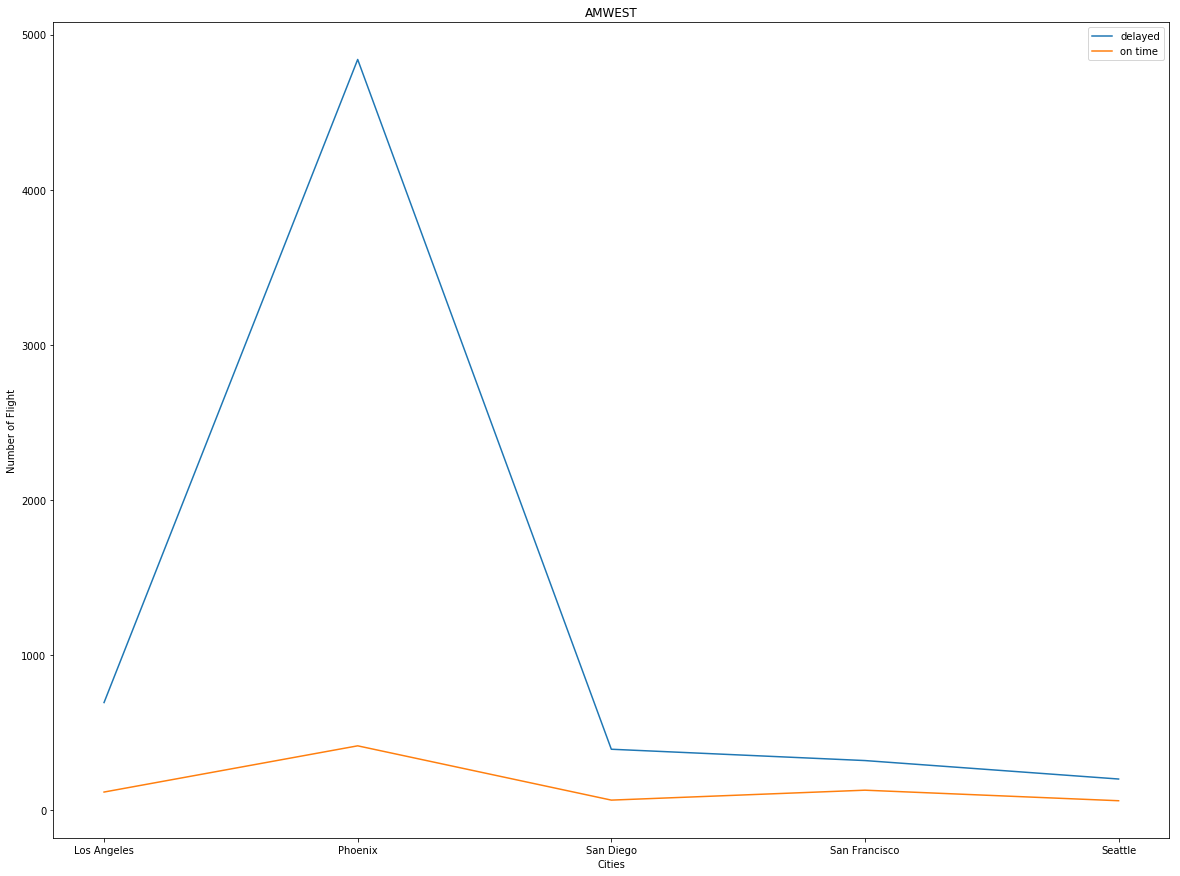

In [46]:
amwest = plt.plot(table.loc['AMWEST'])
plt.title('AMWEST')
plt.ylabel('Number of Flight')
plt.xlabel('Cities')
plt.legend(['delayed', 'on time'])
plt.rcParams["figure.figsize"] = [20, 10]